### Code from: https://pycroscopy.github.io/pycroscopy/auto_examples/plot_spectral_unmixing.html#sphx-glr-auto-examples-plot-spectral-unmixing-py

In [18]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# basic numeric computation:
import numpy as np

# The package used for creating and manipulating HDF5 files:
import h5py

# Plotting and visualization:
import matplotlib.pyplot as plt

# for downloading files:
import wget
import os

# multivariate analysis:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import subprocess
import sys

import pyUSID as usid
import pycroscopy as px
from pycroscopy.viz import cluster_utils

import mypackage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
TensorFlow version is 2.1.0


In [26]:
file_names = ['20200213_114148_fillet_sample39']

X, Y, info = mypackage.Dataset.load_files(file_names, '../data/tomra')
wavelengths = [928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674]

# X, Y = np.squeeze(X), np.squeeze(Y)

In [27]:
X.shape, Y.shape

((1, 100, 100, 208), (1, 100, 100, 1))

In [31]:
num_rows = 100
num_cols = 100

data = mypackage.StackTransform(X, Y)
h5_main = data.X_stack()

freq_vec = wavelengths

print('Data currently of shape:', h5_main.shape)

x_label = 'Wavelength'
y_label = 'Amplitude (a.u.)' # in Arbitrary unit (a.u.)

Data currently of shape: (10000, 208)


In [30]:
h5_main.shape

(10000, 208)

In [2]:
data_file_path = 'temp_um.h5'
# download the data file from Github:
url = 'https://raw.githubusercontent.com/pycroscopy/pycroscopy/master/data/BELine_0004.h5'
data_file_path = wget.download(url, data_file_path, bar=None)

h5_file = h5py.File(data_file_path, mode='r+')

print('Contents of data file:')
print('----------------------')
usid.hdf_utils.print_tree(h5_file)
print('----------------------')

h5_meas_grp = h5_file['Measurement_000']

# Extracting some basic parameters:
num_rows = 100
num_cols = 100

# Getting a reference to the main dataset:
# h5_main = usid.USIDataset(h5_meas_grp['Channel_000/Raw_Data'])
# usid.hdf_utils.write_simple_attrs(h5_main, {'quantity': 'Deflection', 'units': 'V'})

# Extracting the X axis - vector of frequencies
h5_spec_vals = usid.hdf_utils.get_auxiliary_datasets(h5_main, 'Spectroscopic_Values')[-1]
freq_vec = np.squeeze(h5_spec_vals.value) * 1E-3

print('Data currently of shape:', h5_main.shape)

x_label = 'Wavelength'
y_label = 'Amplitude (a.u.)' # in Arbitrary unit (a.u.)

Contents of data file:
----------------------
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Mean_Spectrogram
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
----------------------
Data currently of shape: (16384, 119)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


In [17]:
h5_s, num_rows, num_cols, num_rows*num_cols

(<HDF5 dataset "S": shape (100,), type "<f4">, 128, 128, 16384)

[9.16785359e-01 7.73904398e-02 2.73084338e-03 1.52757065e-03
 4.31969733e-04 1.54318681e-04 1.10612214e-04 1.01104190e-04
 7.64190481e-05 6.76590935e-05 5.59262844e-05 4.12421432e-05
 3.80970014e-05 2.95612845e-05 2.81263165e-05 1.88749764e-05
 1.58252697e-05 1.45644426e-05 1.36234248e-05 1.29819282e-05
 1.16508800e-05 1.05187046e-05 1.04120218e-05 9.70183737e-06
 9.32086914e-06 9.10248582e-06 8.75919068e-06 8.37161042e-06
 8.25114694e-06 7.84958684e-06]
0.99973905
[4.7173043e+04 3.1474304e+03 5.7867029e+02 4.3319983e+02 2.3010539e+02
 1.3753516e+02 1.1646803e+02 1.1133835e+02 9.6784805e+01 9.1086174e+01
 8.2795052e+01 7.1099678e+01 6.8339195e+01 6.0195473e+01 5.8717545e+01
 4.8099400e+01 4.4042500e+01 4.2251648e+01 4.0864109e+01 3.9890621e+01
 3.7790890e+01 3.5907021e+01 3.5724277e+01 3.4484810e+01 3.3803246e+01
 3.3405972e+01 3.2766380e+01 3.2034637e+01 3.1802633e+01 3.1018930e+01]


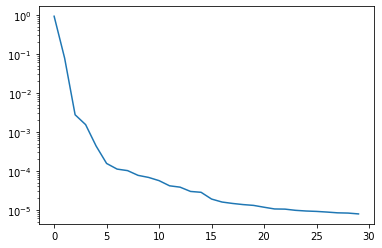

In [40]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

svd = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
svd_fit = svd.fit(h5_main)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

plt.semilogy(svd.explained_variance_ratio_)

In [52]:
U.shape, S.shape, V.shape, my_abun_maps.shape

((10000, 10000), (208,), (208, 208), (100, 100, 25))

(<Figure size 1080x1080 with 18 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7f0646d3b668>)

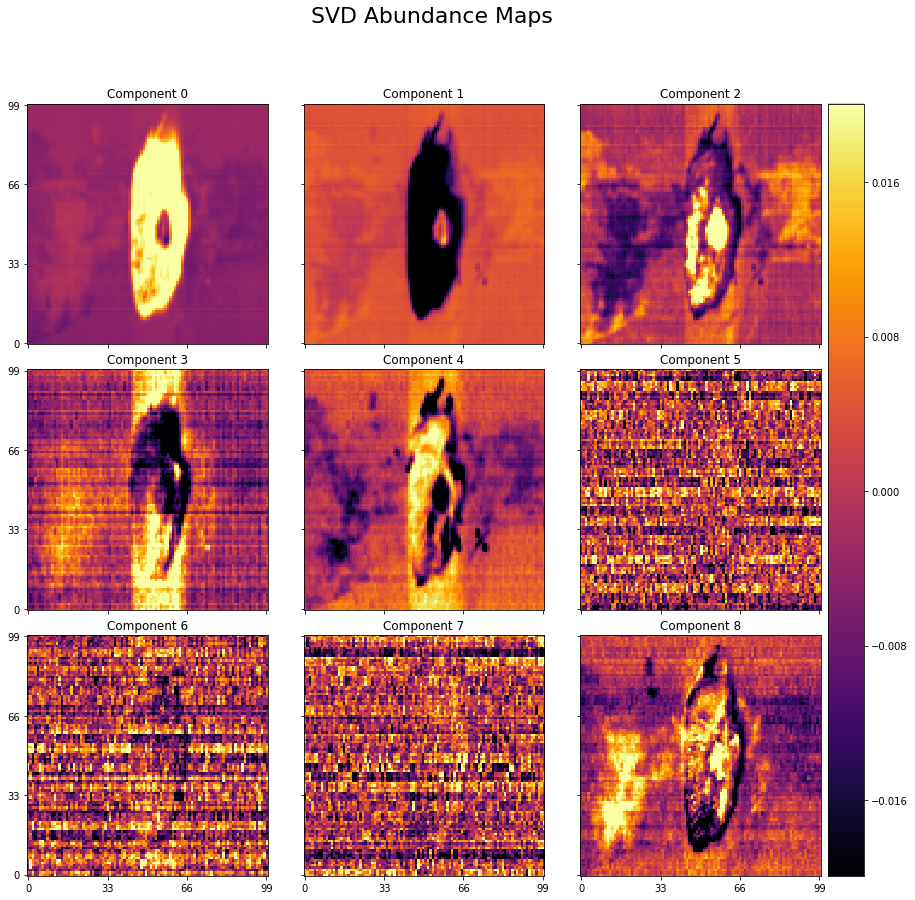

In [51]:
U, S, V = np.linalg.svd(h5_main)
abun_maps = np.reshape(U[:, :25], (num_rows, num_cols, -1))
usid.plot_utils.plot_map_stack(abun_maps, num_comps=9, title='SVD Abundance Maps', reverse_dims=True,
                             color_bar_mode='single', cmap='inferno', title_yoffset=0.95);

In [54]:
h5_s.shape, S.shape

((100,), (208,))

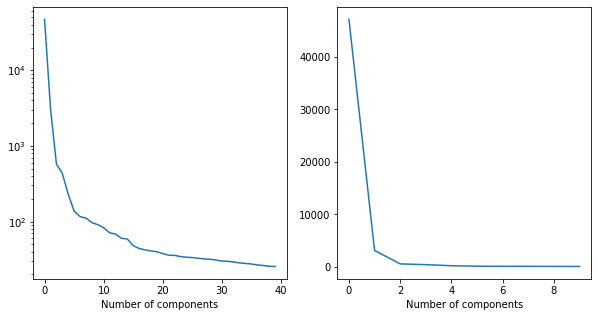

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.semilogy(S[:40])
plt.xlabel("Number of components")
plt.subplot(122)
plt.plot(S[:10])
plt.xlabel("Number of components");


In [32]:
decomposer = px.processing.svd_utils.SVD(h5_main, num_components=100)#, process_name='SVD')
h5_svd_group = decomposer.compute()

h5_u = h5_svd_group['U']
h5_v = h5_svd_group['V']
h5_s = h5_svd_group['S']

# Since the two spatial dimensions (x, y) have been collapsed to one, we need to reshape the abundance maps:
abun_maps = np.reshape(h5_u[:, :25], (num_rows, num_cols, -1))

usid.plot_utils.plot_map_stack(abun_maps, num_comps=9, title='SVD Abundance Maps', reverse_dims=True,
                             color_bar_mode='single', cmap='inferno', title_yoffset=0.95)


# Visualize the variance / statistical importance of each component:
usid.plot_utils.plot_scree(h5_s, title='Note the exponential drop of variance with number of components')

# Visualize the eigenvectors:
_ = usid.plot_utils.plot_complex_spectra(h5_v[:9, :], x_label=x_label, y_label=y_label,
                                       title='SVD Eigenvectors', evenly_spaced=False)

AttributeError: 'numpy.ndarray' object has no attribute 'file'

## KMeans Clustering

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes back to the HDF5 file
Performing clustering on /Measurement_000/Channel_000/Raw_Data.
Took 1.44 sec to compute KMeans
Calculated the Mean Response of each cluster.
Took 360.86 msec to calculate mean response per cluster
Writing clustering results to file.


(<Figure size 396x360 with 2 Axes>, <Figure size 396x720 with 2 Axes>)

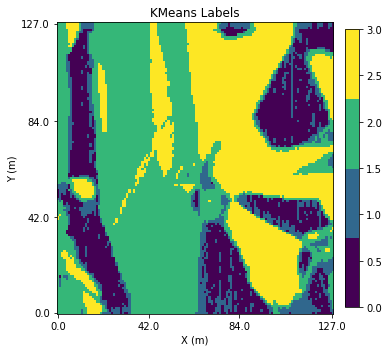

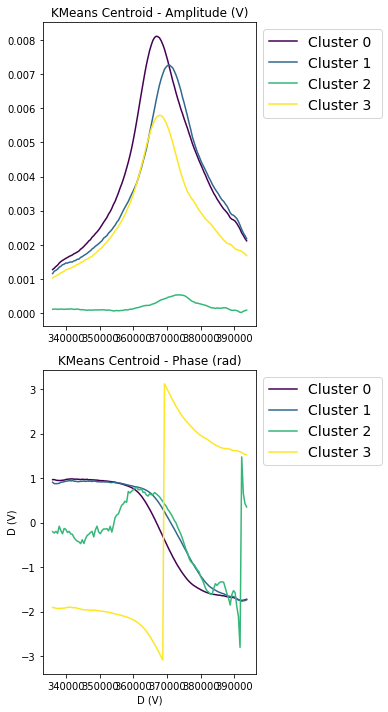

In [8]:
num_clusters = 4

estimator = px.processing.Cluster(h5_main, KMeans(n_clusters=num_clusters))#, process_name='KMeans')
h5_kmeans_grp = estimator.compute(h5_main)
h5_kmeans_labels = h5_kmeans_grp['Labels']
h5_kmeans_mean_resp = h5_kmeans_grp['Mean_Response']

cluster_utils.plot_cluster_h5_group(h5_kmeans_grp)

## Non-negative Matrix Factorization (NMF)

In [15]:
freq_vec, len(freq_vec)

(array([336.00824, 336.49652, 336.98483, 337.4731 , 337.9614 , 338.4497 ,
        338.938  , 339.4263 , 339.91458, 340.4029 , 340.89117, 341.3795 ,
        341.86777, 342.35608, 342.84436, 343.33267, 343.82095, 344.30927,
        344.79755, 345.28586, 345.77414, 346.26245, 346.75073, 347.239  ,
        347.72733, 348.2156 , 348.70392, 349.1922 , 349.6805 , 350.1688 ,
        350.6571 , 351.1454 , 351.6337 , 352.12198, 352.6103 , 353.09857,
        353.58688, 354.07516, 354.56348, 355.05176, 355.54004, 356.02835,
        356.51663, 357.00494, 357.49323, 357.98154, 358.46982, 358.95813,
        359.4464 , 359.93472, 360.423  , 360.91132, 361.3996 , 361.8879 ,
        362.3762 , 362.86453, 363.3528 , 363.84113, 364.3294 , 364.8177 ,
        365.306  , 365.79428, 366.2826 , 366.77087, 367.2592 , 367.74747,
        368.23578, 368.72406, 369.21237, 369.70065, 370.18896, 370.67725,
        371.16556, 371.65384, 372.14215, 372.63043, 373.11874, 373.60703,
        374.0953 , 374.58362, 375.0719

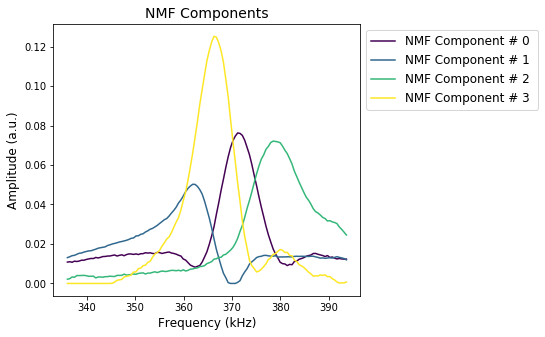

In [9]:
num_comps = 4

# get the non-negative portion of the dataset
# data_mat = np.abs(h5_main)

model = NMF(n_components=num_comps, init='random', random_state=0)
model.fit(data_mat)

fig, axis = plt.subplots(figsize=(5.5, 5))
usid.plot_utils.plot_line_family(axis, freq_vec, model.components_, label_prefix='NMF Component #')
axis.set_xlabel(x_label, fontsize=12)
axis.set_ylabel(y_label, fontsize=12)
axis.set_title('NMF Components', fontsize=14)
axis.legend(bbox_to_anchor=[1.0, 1.0], fontsize=12)

In [ ]:
# Close and delete the h5_file
# h5_file.close()
# os.remove(data_file_path)